In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt

In [26]:
plt.rcParams['figure.figsize'] = (20,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 20}
plt.rc('font', **font)

In [27]:
result = pd.read_csv('./important_csvs/predictions_confidences_csvs/resnet3d-16frames.csv')

In [28]:
result

,exp,bur,fj,ande,fs,label,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf,exp_pred,bur_pred,fj_pred,ande_pred,fs_pred
0,0.0,1.0,0.0,0.0,0.0,bur,0.161617,0.839542,0.143174,0.057854,0.031431,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,fj,0.956148,0.043704,0.874554,0.159228,0.044267,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,fj,0.943624,0.056539,0.947541,0.065553,0.044336,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,anode,0.951940,0.048576,0.081831,0.768656,0.033381,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,bur,0.223271,0.778087,0.083378,0.129049,0.055210,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.0,1.0,0.0,0.0,fj,0.954246,0.045699,0.968744,0.058095,0.034090,1.0,0.0,1.0,0.0,0.0
816,1.0,0.0,0.0,1.0,0.0,anode,0.938070,0.062037,0.097686,0.839202,0.053377,1.0,0.0,0.0,1.0,0.0
817,1.0,0.0,1.0,0.0,0.0,fj,0.950029,0.049207,0.768348,0.226370,0.040396,1.0,0.0,1.0,0.0,0.0
818,1.0,0.0,0.0,0.0,1.0,fs,0.946177,0.054229,0.063404,0.099354,0.844652,1.0,0.0,0.0,0.0,1.0


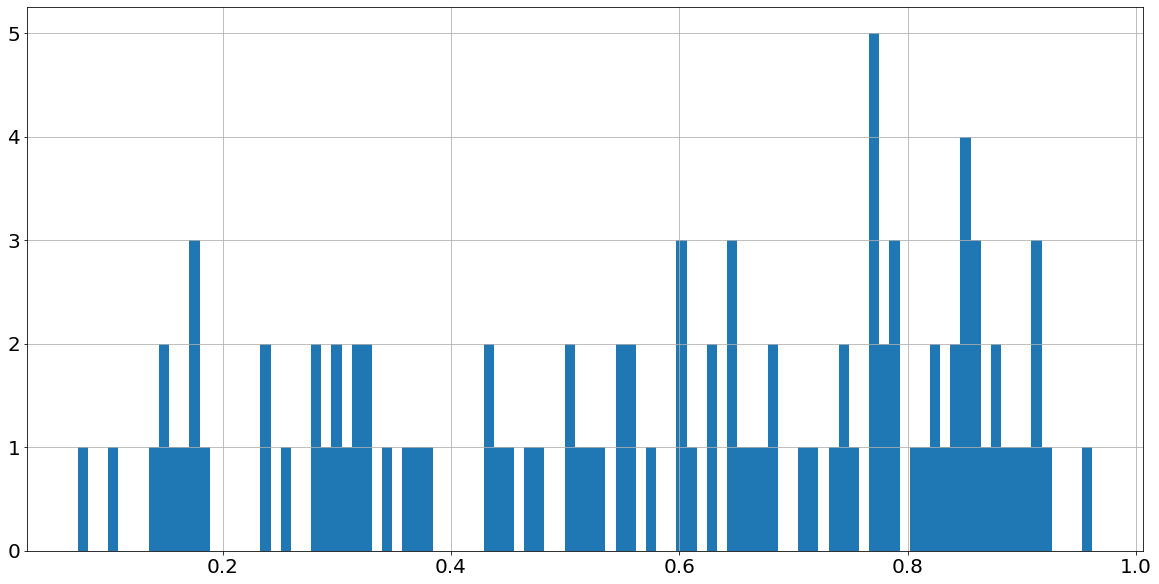

In [29]:
result.ande_conf[result.ande==1].hist(bins=100)
#result.ande_conf[result.ande==0].hist(bins=100)

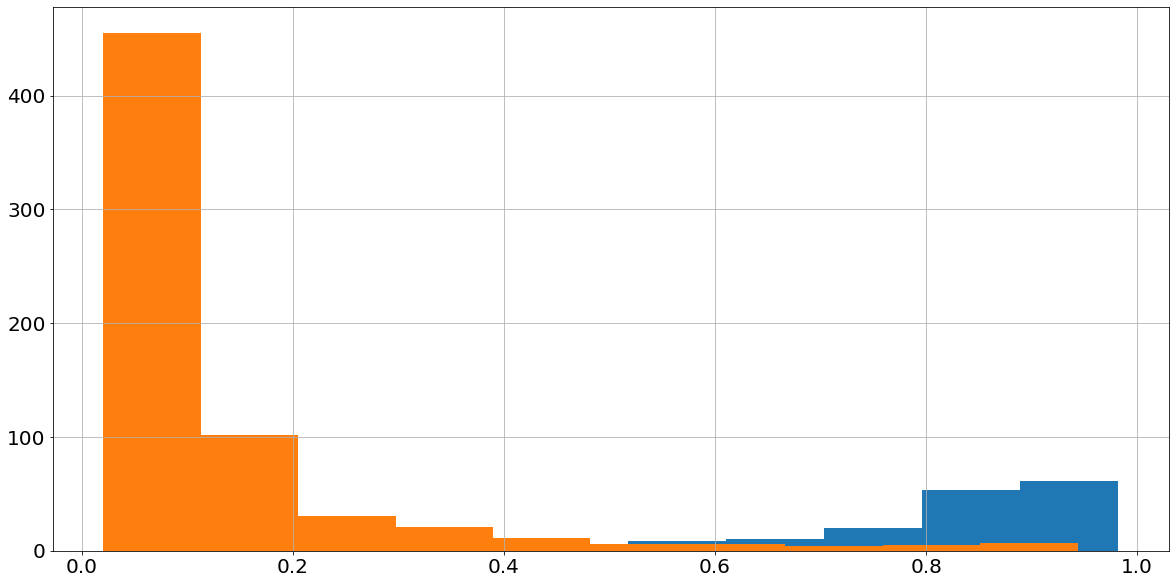

In [30]:
result.fj_conf[result.fj==1].hist()
result.fj_conf[result.fj==0].hist()

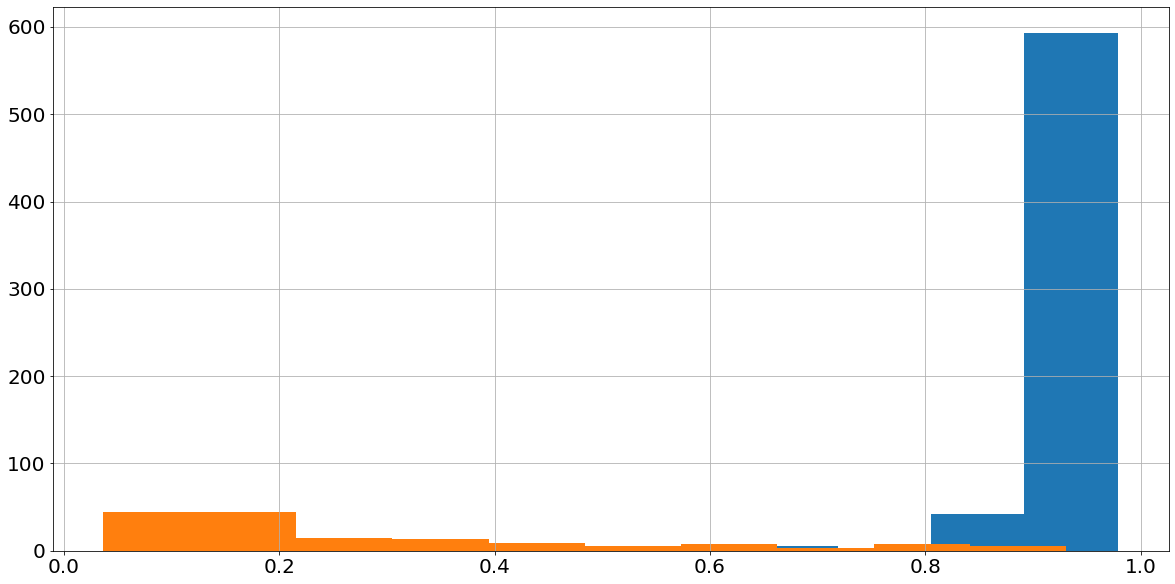

In [31]:
result.exp_conf[result.exp==1].hist()
result.exp_conf[result.exp==0].hist()

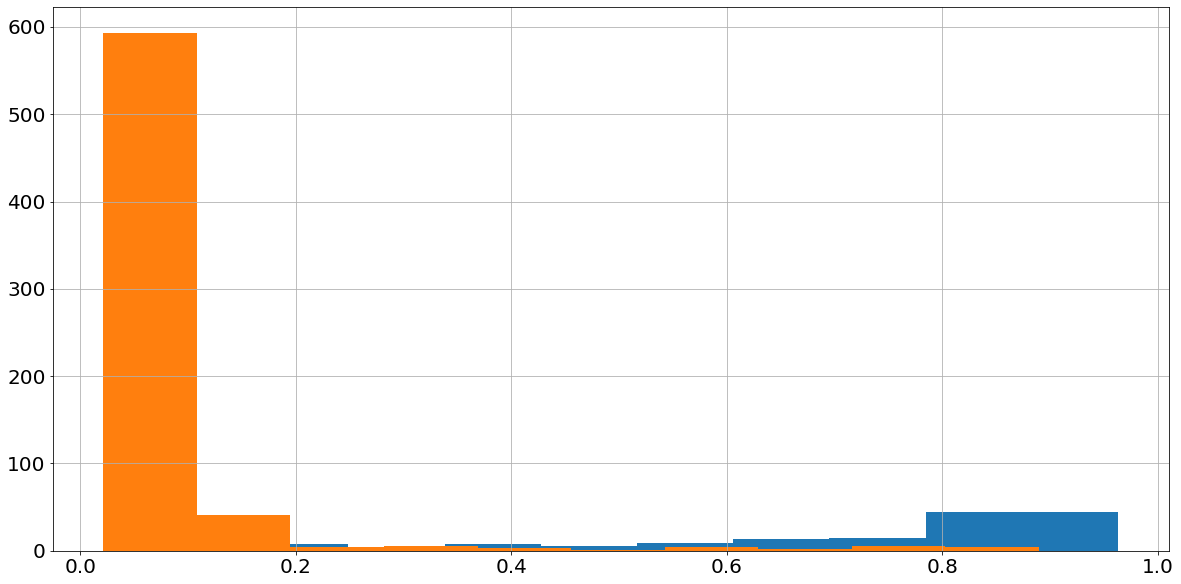

In [32]:
result.bur_conf[result.bur==1].hist()
result.bur_conf[result.bur==0].hist()

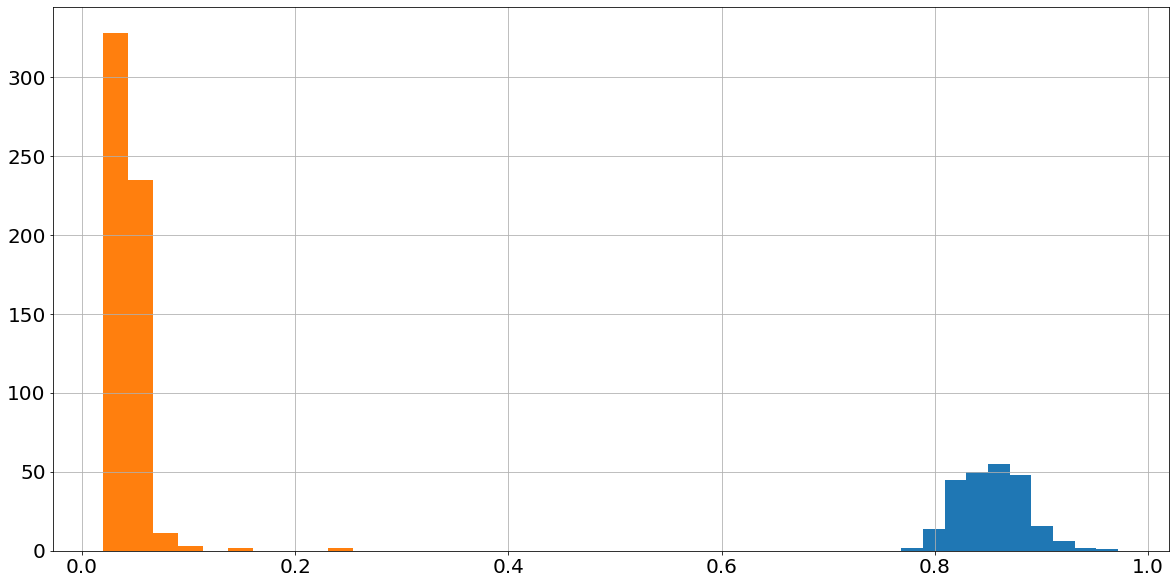

In [33]:
result.fs_conf[result.fs==1].hist()
result.fs_conf[result.fs==0].hist()

In [34]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [37]:
y_test = np.array(result.ande)
prob_pos = np.array(result.ande_conf)

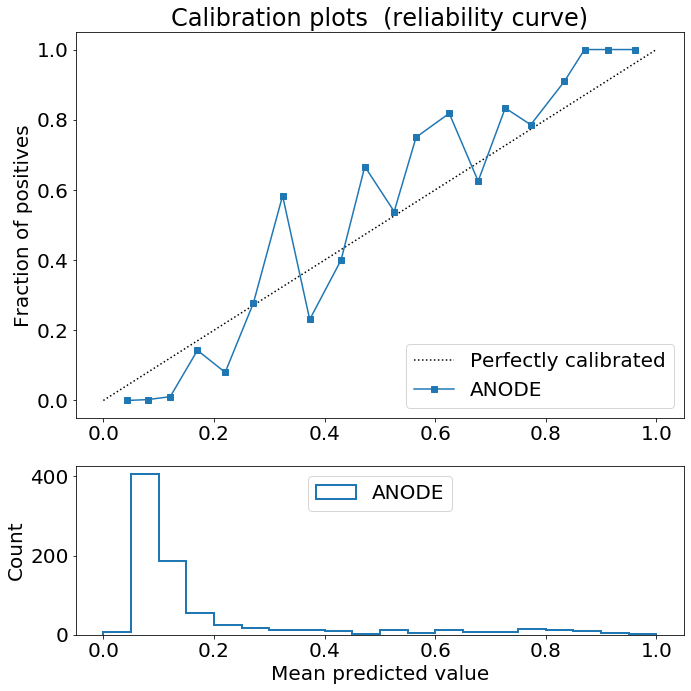

In [38]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="ANODE")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="ANODE",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [39]:
g = mean_predicted_value

In [40]:
f = fraction_of_positives

In [41]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [42]:
idx

array([ 4,  6,  8, 12, 13])

In [43]:
g[idx]

array([0.22031969, 0.32412577, 0.42982439, 0.62549206, 0.67778868])

In [44]:
f[idx]

array([0.08      , 0.58333333, 0.4       , 0.81818182, 0.625     ])

In [45]:
y_test = np.array(result.fs)
prob_pos = np.array(result.fs_conf)

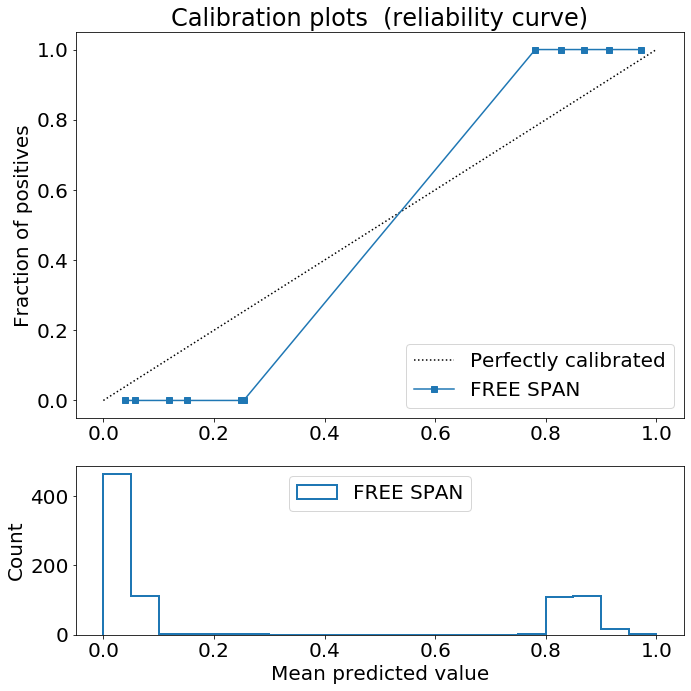

In [46]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="FREE SPAN")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="FREE SPAN",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [47]:
g = mean_predicted_value

In [48]:
f = fraction_of_positives

In [49]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [50]:
idx

array([5])

In [51]:
g[idx]

array([0.2537285])

In [52]:
f[idx]

array([0.])

In [53]:
y_test = np.array(result.bur)
prob_pos = np.array(result.bur_conf)

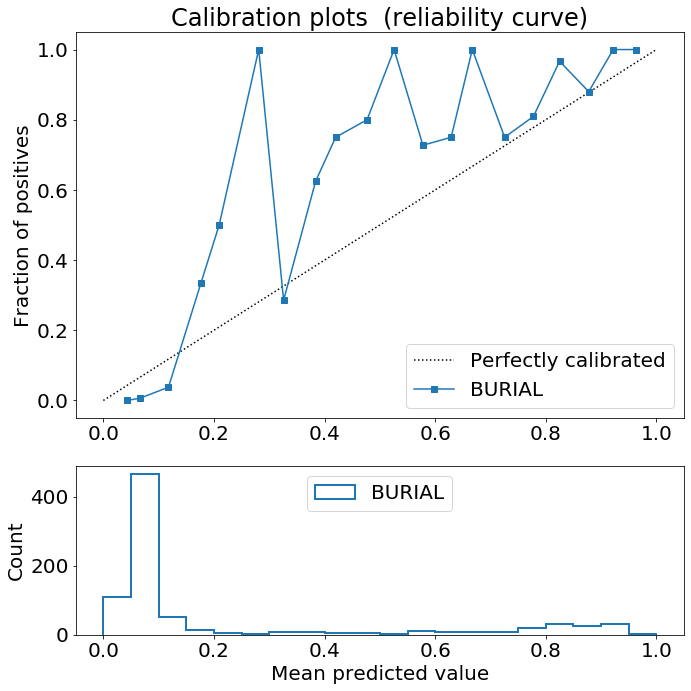

In [54]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="BURIAL")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="BURIAL",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [55]:
g = mean_predicted_value

In [56]:
f = fraction_of_positives

In [57]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [58]:
idx

array([2, 5, 6])

In [59]:
g[idx]

array([0.11779   , 0.28092708, 0.32597791])

In [60]:
f[idx]

array([0.03773585, 1.        , 0.28571429])

In [61]:
y_test = np.array(result.exp)
prob_pos = np.array(result.exp_conf)

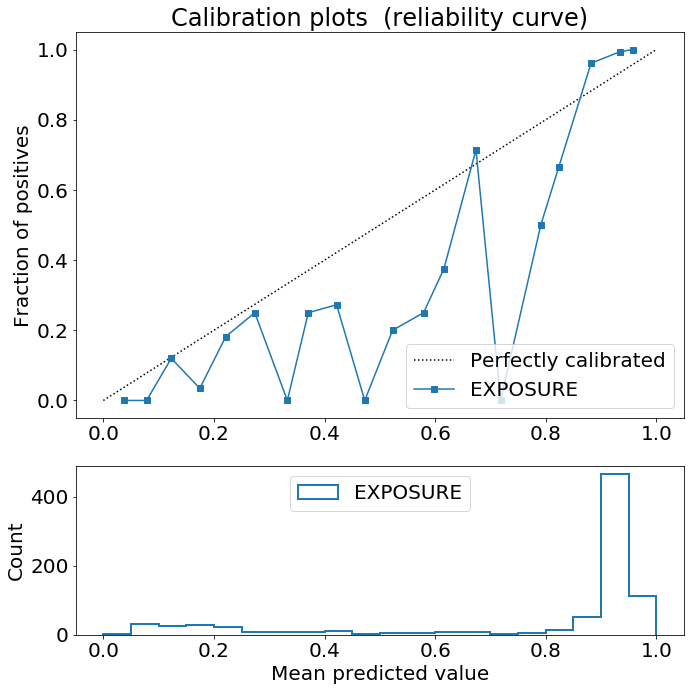

In [62]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="EXPOSURE")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="EXPOSURE",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [63]:
g = mean_predicted_value

In [64]:
f = fraction_of_positives

In [65]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [66]:
idx

array([12, 13, 16])

In [67]:
g[idx]

array([0.61577932, 0.67381407, 0.82386056])

In [68]:
f[idx]

array([0.375     , 0.71428571, 0.66666667])

In [69]:
y_test = np.array(result.fj)
prob_pos = np.array(result.fj_conf)

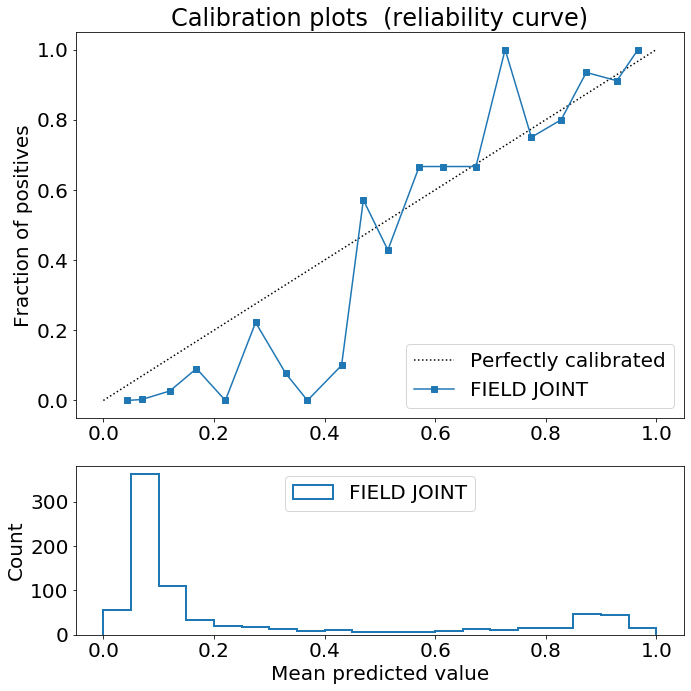

In [70]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="FIELD JOINT")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="FIELD JOINT",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [71]:
g = mean_predicted_value

In [72]:
f = fraction_of_positives

In [73]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [74]:
idx

array([ 8,  9, 10, 12, 13, 14, 16, 17, 18])

In [75]:
g[idx]

array([0.43078046, 0.47017016, 0.51449345, 0.61493546, 0.67380313,
       0.7265531 , 0.82794728, 0.87327239, 0.92863278])

In [76]:
f[idx]

array([0.1       , 0.57142857, 0.42857143, 0.66666667, 0.66666667,
       1.        , 0.8       , 0.93478261, 0.91111111])

In [ ]:
from sklearn.calibration import IsotonicRegression

In [23]:
from calibration_module.calibrator import (
    HistogramCalibrator,
    PlattCalibrator,
    PlattHistogramCalibrator
)

In [54]:
result['exp_pred'] = 0.0
result['bur_pred'] = 0.0
result['fj_pred'] = 0.0
result['ande_pred'] = 0.0
result['fs_pred'] = 0.0

In [55]:
result

,exp,bur,fj,ande,fs,label,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf,exp_pred,bur_pred,fj_pred,ande_pred,fs_pred
0,0.0,1.0,0.0,0.0,0.0,bur,0.161617,0.839542,0.143174,0.057854,0.031431,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,fj,0.956148,0.043704,0.874554,0.159228,0.044267,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,fj,0.943624,0.056539,0.947541,0.065553,0.044336,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,anode,0.951940,0.048576,0.081831,0.768656,0.033381,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,bur,0.223271,0.778087,0.083378,0.129049,0.055210,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.0,1.0,0.0,0.0,fj,0.954246,0.045699,0.968744,0.058095,0.034090,0.0,0.0,0.0,0.0,0.0
816,1.0,0.0,0.0,1.0,0.0,anode,0.938070,0.062037,0.097686,0.839202,0.053377,0.0,0.0,0.0,0.0,0.0
817,1.0,0.0,1.0,0.0,0.0,fj,0.950029,0.049207,0.768348,0.226370,0.040396,0.0,0.0,0.0,0.0,0.0
818,1.0,0.0,0.0,0.0,1.0,fs,0.946177,0.054229,0.063404,0.099354,0.844652,0.0,0.0,0.0,0.0,0.0


In [56]:
for i in range(len(result)):
    if result.bur_conf[i] >= 0.5:
        result.bur_pred[i]= 1.0
    if result.ande_conf[i] >= 0.5:
        result.ande_pred[i] = 1.0
    if result.fj_conf[i] >= 0.5:
        result.fj_pred[i] = 1.0
    if result.fs_conf[i] >= 0.5:
        result.fs_pred[i] = 1.0
    if result.exp_conf[i] >= 0.5:
        result.exp_pred[i] = 1.0

/home/astamoulakatos/.conda/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/astamoulakatos/.conda/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/astamoulakatos/.conda/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [57]:
result

,exp,bur,fj,ande,fs,label,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf,exp_pred,bur_pred,fj_pred,ande_pred,fs_pred
0,0.0,1.0,0.0,0.0,0.0,bur,0.161617,0.839542,0.143174,0.057854,0.031431,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,fj,0.956148,0.043704,0.874554,0.159228,0.044267,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,fj,0.943624,0.056539,0.947541,0.065553,0.044336,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,anode,0.951940,0.048576,0.081831,0.768656,0.033381,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,bur,0.223271,0.778087,0.083378,0.129049,0.055210,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.0,1.0,0.0,0.0,fj,0.954246,0.045699,0.968744,0.058095,0.034090,1.0,0.0,1.0,0.0,0.0
816,1.0,0.0,0.0,1.0,0.0,anode,0.938070,0.062037,0.097686,0.839202,0.053377,1.0,0.0,0.0,1.0,0.0
817,1.0,0.0,1.0,0.0,0.0,fj,0.950029,0.049207,0.768348,0.226370,0.040396,1.0,0.0,1.0,0.0,0.0
818,1.0,0.0,0.0,0.0,1.0,fs,0.946177,0.054229,0.063404,0.099354,0.844652,1.0,0.0,0.0,0.0,1.0


In [58]:
len(result[(result.bur_pred==1.0) & (result.exp_pred==1.0)])

0

# 28 events that both burial and exposure are predicted

In [52]:
burexp = result[(result.bur_pred==1.0) & (result.exp_pred==1.0)]

In [53]:
burexp

,exp,bur,fj,ande,fs,label,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf,exp_pred,bur_pred,fj_pred,ande_pred,fs_pred


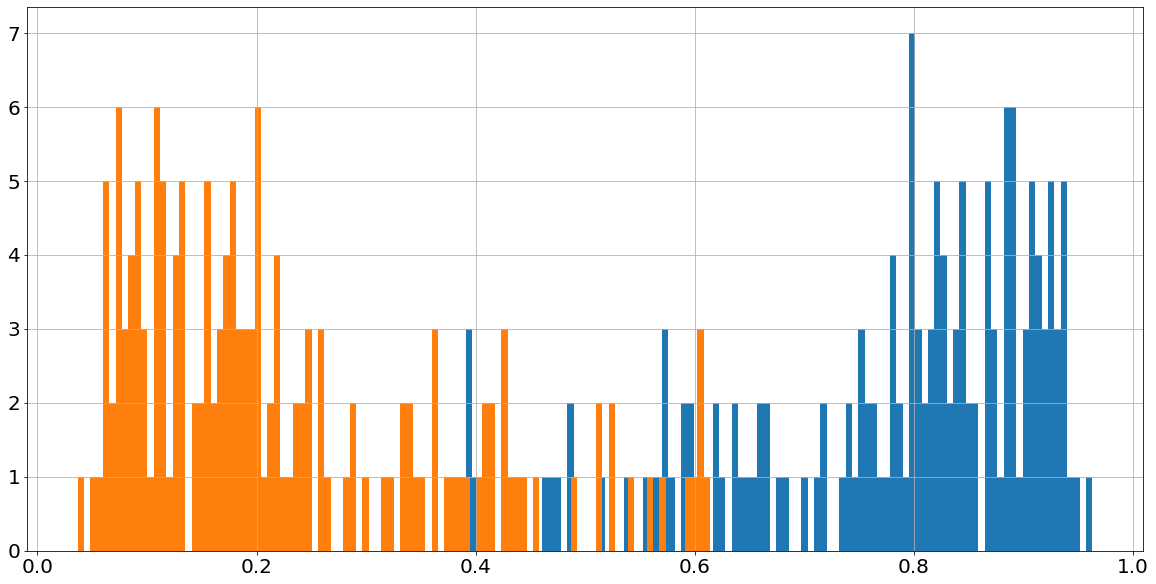

In [56]:
result.bur_conf[result.bur_pred==1].hist(bins=100)
result.exp_conf[result.bur_pred==1].hist(bins=100)

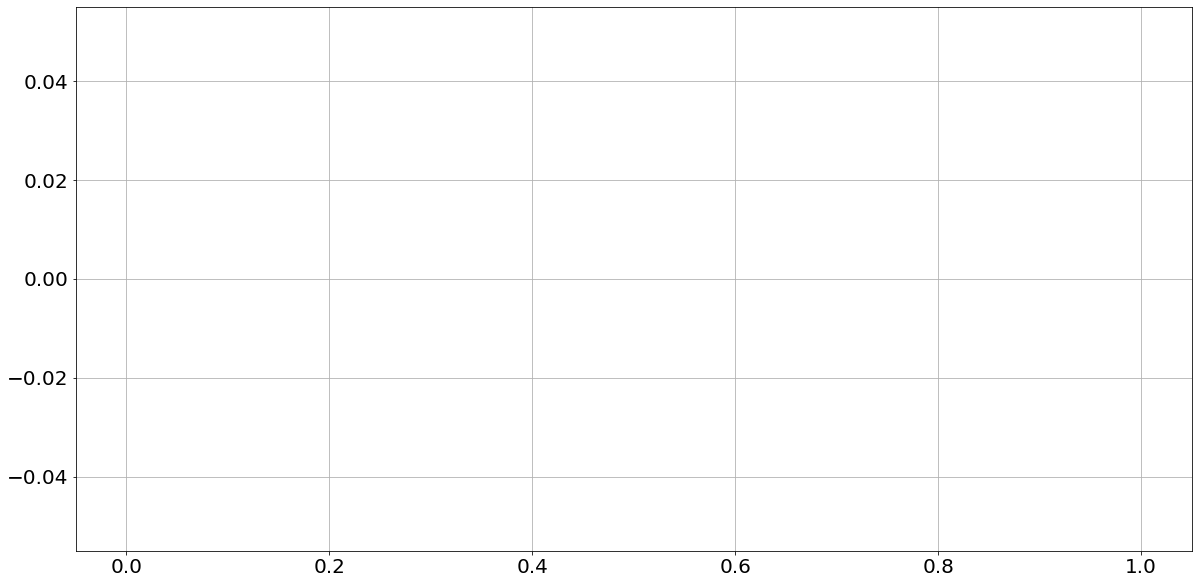

In [57]:
burexp.bur_conf[result.bur_pred==1].hist(bins=20)
burexp.exp_conf[result.bur_pred==1].hist(bins=20)